In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio
from scipy.fft import rfftfreq

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, lfilter

16000


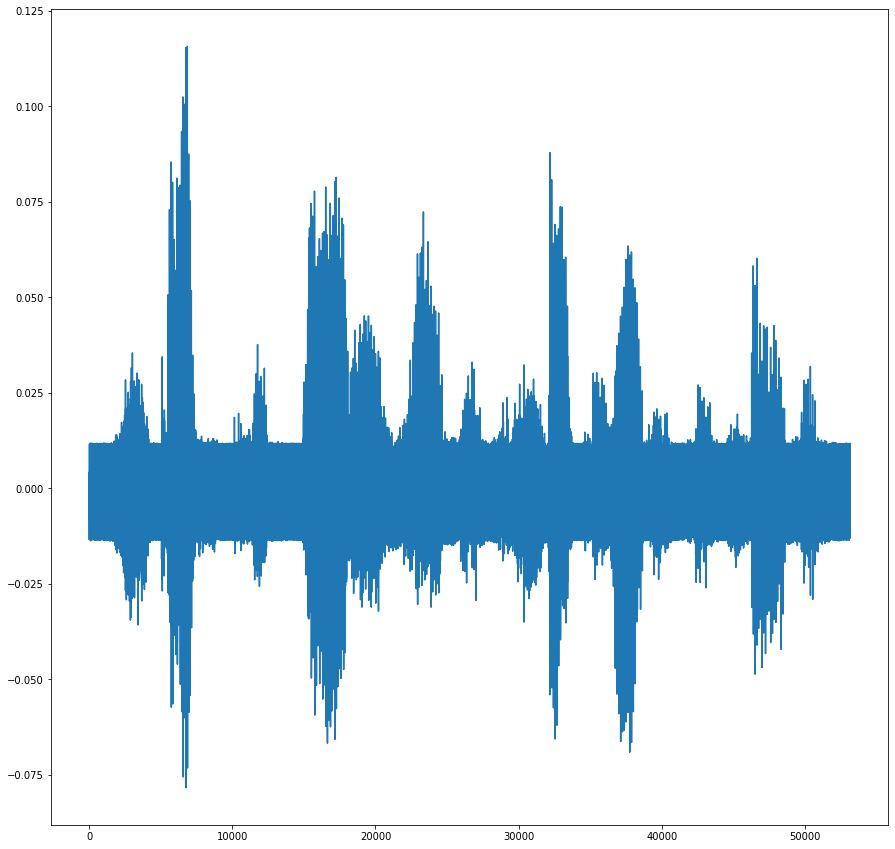

In [3]:
x, Fs = librosa.load("audio/xstude24.wav", sr=16000)
print(Fs)
plt.figure(figsize=(15,15))
plt.plot(x)
plt.show()

In [4]:
frame_len = int(0.05 * Fs)
shift = int(0.05 * Fs)

frames = np.array([x[i*shift:i*shift + frame_len] for i in range(len(x) //shift - frame_len//shift + 1)])

In [5]:
filtered_X = np.array([np.abs(np.fft.fft(x, n=4096)) for x in frames])

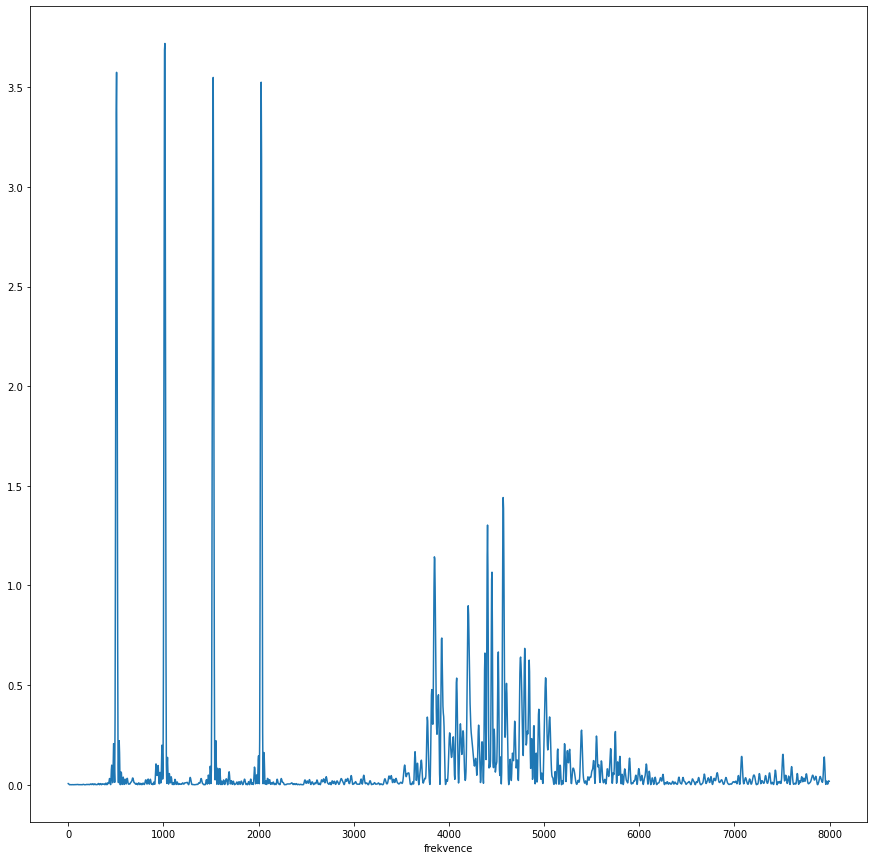

In [6]:
f_axis = np.arange(2048)
plt.figure(figsize=(15,15))
plt.plot(f_axis/4096 * Fs, filtered_X[3][:2048]**2)
plt.xlabel('frekvence')
plt.show()

In [7]:
def normalize(audio: np.ndarray) -> np.ndarray:
    audio = audio - np.mean(audio)
    return audio / (max(audio.min(), audio.max(), key=abs))

506.980769954465 Hz
1013.96153990893 Hz
1520.9423098633952 Hz
2027.92307981786 Hz


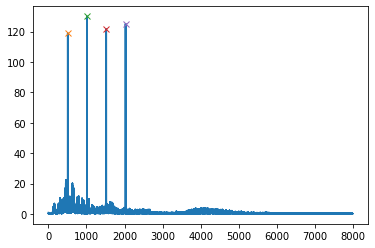

In [12]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
SAMPLE_RATE = 16000
DURATION = 4.16

my, _ = librosa.load("audio/xstude24.wav", sr=16000)

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = np.abs(fft(my))
xf = np.abs(fftfreq(my.size, 1 / SAMPLE_RATE))

peaks, _ = find_peaks(yf, height=40)
peaks = peaks[:int(peaks.size/2)]

plt.plot(np.abs(xf), np.abs(yf))
for peak in peaks:
    print(np.abs(xf)[peak], "Hz")
    plt.plot(np.abs(xf)[peak], np.abs(yf)[peak], "x")


plt.show()

[52.36729497 52.87199826 52.56454303 51.29379436 53.61335364 48.87727897
 55.48929981 52.54140283 52.31430098 55.24113597 44.93362694 62.56468118
 43.91968006 61.66618501 56.23661799 47.77557128 55.36050027 54.7682169
 50.31259329 52.26258953 52.56459969 52.62788186 52.05743994 52.87144765
 52.60602066 55.05071464 46.29424631 48.94106201 52.44483713 53.04817838
 52.45368605 53.53713729 49.81973459 58.05549002 53.58187079 55.54657544
 51.9041963  52.48876719 44.41206859 70.13598762 67.85469051 76.80354419
 66.9702929  62.54590098 37.21989193 65.57874903 49.60766684 51.4548874
 52.32508599 51.33859395 57.36494382 61.80766359 48.29745841 75.81511543
 61.48808921 67.05514566 49.35186513 51.55160247 52.90132502 52.30253848
 52.45898514 52.75611241 52.44041316 52.6430418  51.79662319 52.66210873
 52.05648301 52.96067468 52.88459331 57.37406043 82.420327   82.32890836
 68.22904623 44.78891026 51.35054495 53.36638638 48.45431163 55.94024429
 51.89114418 53.56220362 53.73417015 51.9893532  52.5

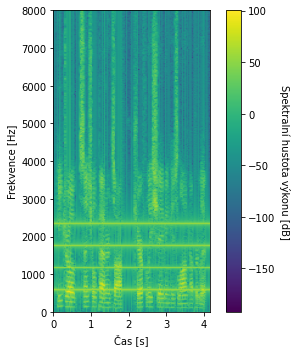

In [7]:
    import numpy as np
    def normalize(audio):
        audio = audio - np.mean(audio)
        return audio / (max(audio.min(), audio.max(), key=abs))
    
    SAMPLES_OVERLAP = 512
    normalized = normalize(x)
    columns = normalized.size // SAMPLES_OVERLAP

    frames = list()
    for i in range(0, columns - 1):
        frames.append(normalized[i * SAMPLES_OVERLAP: (i * SAMPLES_OVERLAP) + 1024])

    filtered_X = np.array([np.abs(np.fft.fft(y)) for y in frames])
    plt.figure(figsize=(5, 5))
    x = 10*np.log(filtered_X.T[:512]**2)
    print(x[38])
    print(x[72])
    print(x[113])
    print(x[151])

    plt.imshow(x, extent=(0, 4.16, 16000 // 2, 0))

    db = plt.colorbar()
    db.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

    plt.gca().set_xlabel('Čas [s]')
    plt.gca().set_ylabel('Frekvence [Hz]')
    plt.gca().invert_yaxis()
    plt.gca().set_aspect(0.001)
    plt.tight_layout()

    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [8]:
print(np.median(x[38]))

52.56459968515789


In [9]:
print(np.median(x[36]))
print(np.median(x[41]))

35.700478374896974
18.308491630709465


In [10]:
print(36, np.median(x[36]))
print(37, np.median(x[37]))
print(38, np.median(x[38]))
print(39, np.median(x[39]))
print(40, np.median(x[40]))
print(41, np.median(x[41]))

36 35.700478374896974
37 58.99947823725686
38 52.56459968515789
39 33.26438630472895
40 25.19030733312579
41 18.308491630709465


In [11]:
print(36, np.average(x[36]))
print(37, np.average(x[37]))
print(38, np.average(x[38]))
print(39, np.average(x[39]))
print(40, np.average(x[40]))
print(41, np.average(x[41]))

print(70, np.average(x[70]))
print(71, np.average(x[71]))
print(72, np.average(x[72]))
print(73, np.average(x[73]))
print(74, np.average(x[74]))
print(75, np.average(x[75]))

36 38.7485869431216
37 59.482476872154834
38 54.21209405497697
39 37.34109623833371
40 32.01182396092858
41 26.52432384250079
70 6.466685676712366
71 8.189044881330656
72 10.858808154982254
73 16.105593270418154
74 30.792617870461186
75 64.27284835846086


In [12]:

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.cos((2 * np.pi) * frequencies)
    return x, y


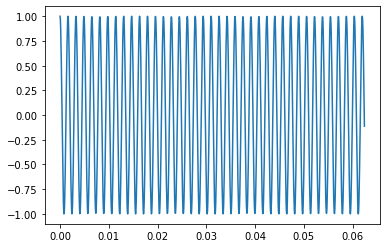

In [13]:
x, y = generate_sine_wave(612.9, 16000, 4)
plt.plot(x[:1000], y[:1000])
plt.show()
plt.clf()
plt.cla()
plt.close()

In [14]:
time, f2 = generate_sine_wave(1225.8, 16000, 4)
_, f3 = generate_sine_wave(1822.6, 16000, 4)
_, f4 = generate_sine_wave(2435.5, 16000, 4)
mixed = y + f2 + f3 + f4


In [15]:
from scipy.signal import spectrogram

f, t, sgr = spectrogram(mixed, 16000)
# prevod na PSD
# (ve spektrogramu se obcas objevuji nuly, ktere se nelibi logaritmu, proto +1e-20)
sgr_log = 10 * np.log10(sgr+1e-20)

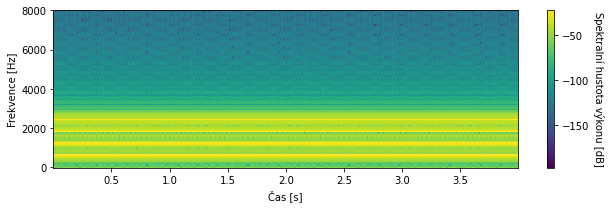

In [16]:
plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

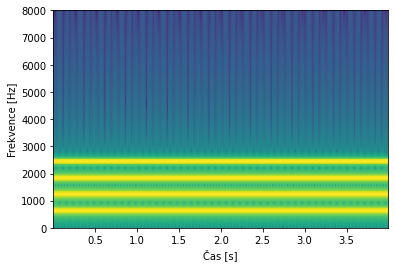

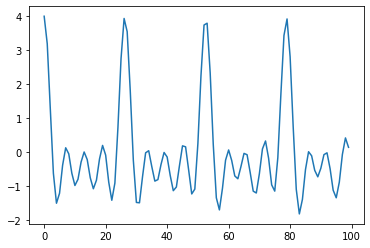

In [17]:
plt.specgram(mixed, Fs=16000)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
plt.show()

plt.plot(mixed[:100])
plt.show()

In [18]:
# TASK 4.7
from scipy.signal import butter, lfilter, buttord, iirfilter
RIPPLE=3
ATTENUATION=40
# https://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter
def bandstop(lowcut, highcut, fs, order=5):
    fs /= 2  # iirfilter uses Nyquist's freqs
    lowcut /= fs
    highcut /= fs
 
    return iirfilter(order, [lowcut, highcut], RIPPLE, ATTENUATION, "bandstop")


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = bandstop(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

b= [0.96868843 0.94718243 4.22206143 2.89814682 6.51020493 2.89814682
 4.22206143 0.94718243 0.96868843] a= [1.         0.97002267 4.28923953 2.92095344 6.50916611 2.8748609
 4.15494174 0.9248215  0.93835727]


<Figure size 432x288 with 0 Axes>

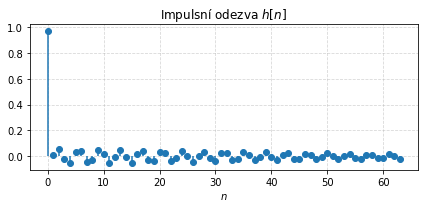

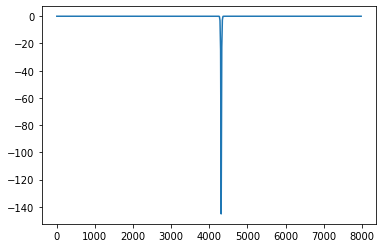

In [19]:
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 16000.0
    lowcut = 4321-40
    highcut = 4321+22

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    
    
    
    b, a = bandstop(lowcut, highcut, fs, 4)
    #^^^ toto su tie koeficienty
    print("b=", b, "a=", a)
    N_imp = 64
    imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls
    h = lfilter(b, a, imp)
    


    plt.figure(figsize=(6,3))
    plt.stem(np.arange(N_imp), h, basefmt=' ')
    plt.gca().set_xlabel('$n$')
    plt.gca().set_title('Impulsní odezva $h[n]$')

    plt.grid(alpha=0.5, linestyle='--')

    plt.tight_layout()
    plt.show()



    # TASK 4.8
    w, h = freqz(b, a)
    plt.plot((fs * 0.5 / np.pi) * w,  20 * np.log10(np.maximum(abs(h), 1e-9)))
    plt.show()


nuly =  [-0.12227672+0.99260649j -0.12227672-0.99260649j -0.1221208 +0.99255429j
 -0.1221208 -0.99255429j -0.1223289 +0.99245057j -0.1223289 -0.99245057j
 -0.122173  +0.99239839j -0.122173  -0.99239839j]
poly =  [-0.1327545 +0.98646623j -0.1327545 -0.98646623j -0.11053114+0.98918991j
 -0.11053114-0.98918991j -0.1254364 +0.98083326j -0.1254364 -0.98083326j
 -0.1162893 +0.98194691j -0.1162893 -0.98194691j]


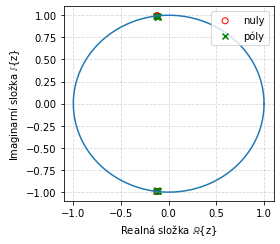

In [20]:
# TASK 4.8
from scipy.signal import tf2zpk
# nuly, poly
z, p, k = tf2zpk(b, a)
print("nuly = ", z)
print("poly = ", p)

plt.clf()
plt.cla()
plt.close()
plt.figure(figsize=(4,3.5))

# jednotkova kruznice
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))

# nuly, poly
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')

plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')

plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper right')

plt.tight_layout()


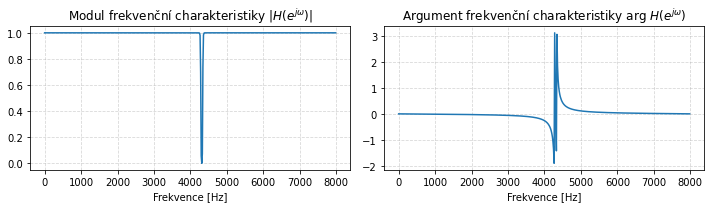

In [21]:
# TASK 4.9
_, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].plot(w / 2 / np.pi * fs, np.abs(h))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

ax[1].plot(w / 2 / np.pi * fs, np.angle(h))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

In [22]:
filtred = butter_bandpass_filter(x, 612.9-50, 662.9, 16000)

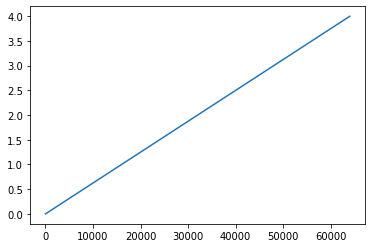

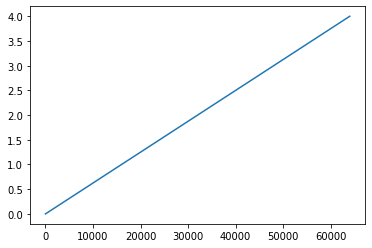

In [23]:
plt.plot(x)
plt.show()
b,a = bandstop(4321, 4321, 16000)
plt.plot(filtred)
plt.show()

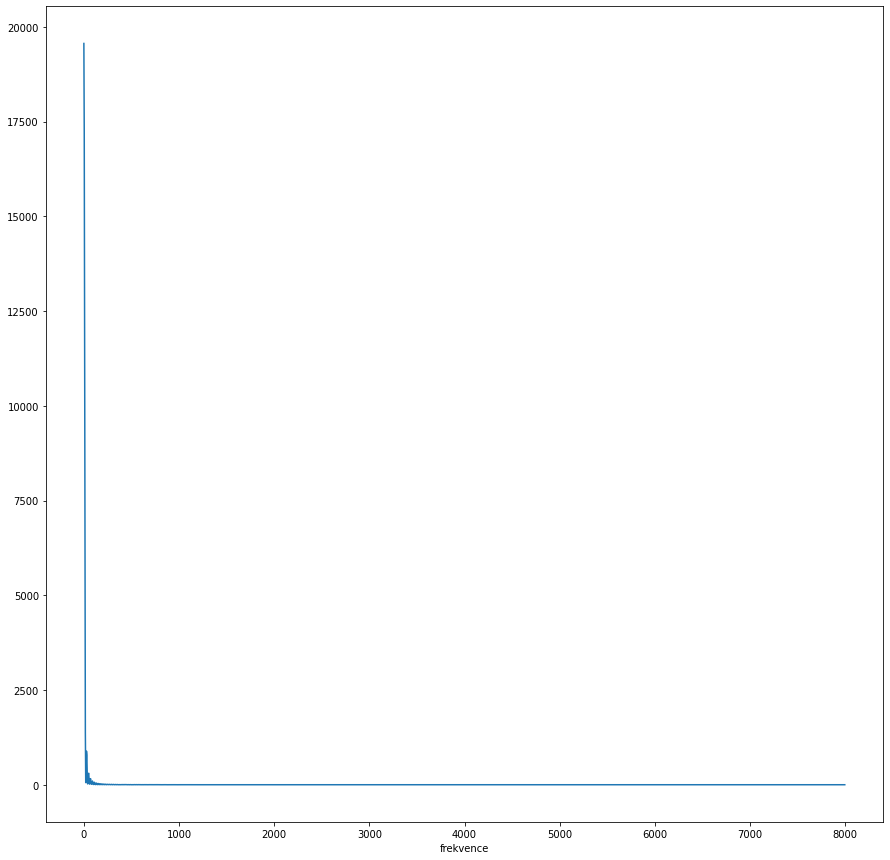

In [24]:

frames = np.array([filtred[i*shift:i*shift + frame_len] for i in range(len(x) //shift - frame_len//shift + 1)])
filtered_X = np.array([np.abs(np.fft.fft(x, n=4096)) for x in frames])
f_axis = np.arange(2048)
plt.figure(figsize=(15,15))
plt.plot(f_axis/4096 * Fs, filtered_X[3][:2048]**2)
plt.xlabel('frekvence')
plt.show()



In [25]:
from IPython.display import Audio
def bandstop(freq, N=3):
    Fs = 16000 / 2  # iirfilter uses Nyquist's freqs
    lowcut = (freq - 50) / Fs
    highcut = (freq + 50) / Fs

    return iirfilter(N, [lowcut, highcut], 3, 40, "bandstop", output="ba")

def fourierka(x):
    plt.plot(x)
    plt.show()

    # fft
    frame_len = int(0.05 * Fs)
    shift = int(0.05 * Fs)

    frames = np.array([x[i*shift:i*shift + frame_len] for i in range(len(x) //shift - frame_len//shift + 1)])
    filtered_X = np.array([np.abs(np.fft.fft(x, n=4096)) for x in frames])
    f_axis = np.arange(2048)
    plt.figure(figsize=(15,15))
    plt.plot(f_axis/4096 * Fs, filtered_X[3][:2048]**2)
    plt.xlabel('frekvence')
    plt.show()
def play(x):
    Audio(data=x, rate=16000)

In [26]:
def butter_bandstop(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a


def butter_bandstop_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandstop(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [27]:
FOUND_F1 = 584.0   # 584.0
FOUND_F2 = 1169.0  # 1169.0
FOUND_F3 = 1754.0  # 1754.0
FOUND_F4 = 2338.0  # 2338.0 ???

In [28]:
#from scipy.signal import iirnotch


#fs = 16000.0  # Sample frequency (Hz)
#f0 = FOUND_F4  # Frequency to be removed from signal (Hz)
#Q = 30.0  # Quality factor

#b, a = signal.iirnotch(2 * f0/fs, Q)
#w, h = freqz(b, a)
#plt.plot((fs * 0.5 / np.pi) * w,  20 * np.log10(np.maximum(abs(h), 1e-9)))
#plt.show()

#wav = signal.lfilter(b, a, x)
#fourierka(wav)
#Audio(data=wav, rate=16000)


In [29]:
from scipy.signal import iirnotch


fs = 16000.0  # Sample frequency (Hz)
f0 = FOUND_F4  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor

b, a = butter_bandstop(f0-50, f0+50, 16000)
w, h = freqz(b, a)
#plt.plot((fs * 0.5 / np.pi) * w,  20 * np.log10(np.maximum(abs(h), 1e-9)))
#plt.show()

wav = signal.lfilter(b, a, wav)
fourierka(wav)
Audio(data=wav, rate=16000)

NameError: name 'wav' is not defined

In [ ]:
def bandstop2(freq, N=3):
    Fs = 16000 / 2  # iirfilter uses Nyquist's freqs
    lowcut = (freq - 50) / Fs
    highcut = (freq + 50) / Fs

    return iirfilter(N, [lowcut, highcut], 3, 40, "bandstop", output="ba")


In [ ]:
b,a = bandstop2(FOUND_F1)
w, h = freqz(b, a)
#plt.plot((fs * 0.5 / np.pi) * w,  20 * np.log10(np.maximum(abs(h), 1e-9)))
#plt.show()

wav2 = signal.lfilter(b, a, x)
fourierka(wav2)
Audio(data=wav2, rate=16000)

In [ ]:
b,a = bandstop2(FOUND_F2)
w, h = freqz(b, a)
#plt.plot((fs * 0.5 / np.pi) * w,  20 * np.log10(np.maximum(abs(h), 1e-9)))
#plt.show()

wav2 = signal.lfilter(b, a, wav2)
fourierka(wav2)
Audio(data=wav2, rate=16000)

In [ ]:
b,a = bandstop2(FOUND_F3)
w, h = freqz(b, a)
#plt.plot((fs * 0.5 / np.pi) * w,  20 * np.log10(np.maximum(abs(h), 1e-9)))
#plt.show()

wav2 = signal.lfilter(b, a, wav2)
fourierka(wav2)
Audio(data=wav2, rate=16000)

In [ ]:
b,a = bandstop2(FOUND_F4)
w, h = freqz(b, a)
#plt.plot((fs * 0.5 / np.pi) * w,  20 * np.log10(np.maximum(abs(h), 1e-9)))
#plt.show()

wav2 = signal.lfilter(b, a, wav2)
fourierka(wav2)
Audio(data=wav2, rate=16000)

In [ ]:
audio = x
for i, freq in enumerate([FOUND_F1, FOUND_F2, FOUND_F3, FOUND_F4]):
    b, a = bandstop2(freq)
    audio = lfilter(b, a, audio)


In [ ]:
Audio(data=audio, rate=16000)

In [ ]:
import src.constants as constants
import src.files as files
from src.output import task_4_10
